In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df=pd.read_csv('D:\Practise\Kaggle\Classification\Titanic\_atitanic\_train.csv')
df.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


In [3]:
df.shape

(891, 12)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


In [5]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [6]:
print("% Null Values in Age column",df['Age'].isnull().sum()/len(df['Age']))
print("% Null Values in Cabin column",df['Cabin'].isnull().sum()/len(df['Cabin']))

% Null Values in Age column 0.19865319865319866
% Null Values in Cabin column 0.7710437710437711


In [7]:
#So it's better to drop the cabin column
df.drop(columns=['Cabin'],axis=1,inplace=True)
df.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S


In [8]:
df.groupby(['Survived'])['Age'].mean()

Survived
0    30.626179
1    28.343690
Name: Age, dtype: float64

In [9]:
#So it will be better if we fill the NaN values in age column with 29
df['Age']=df['Age'].fillna(29)
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       2
dtype: int64

In [10]:
#Two NaN in Embarked column let's drop that
df=df.dropna()
df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Embarked       0
dtype: int64

In [11]:
df.shape

(889, 11)

In [12]:
df['PassengerId'].head(10)

0     1
1     2
2     3
3     4
4     5
5     6
6     7
7     8
8     9
9    10
Name: PassengerId, dtype: int64

In [13]:
#PassengerId contains the unique id coreesponding to each passenger it has no relation with the output so we can drop that column and also the Name column has no effect on output so we can drop that also
df.drop(columns=['PassengerId','Name'],axis=1,inplace=True)
df.shape

(889, 9)

In [14]:
df.head(2)

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,male,22.0,1,0,A/5 21171,7.2500,S
1,1,1,female,38.0,1,0,PC 17599,71.2833,C


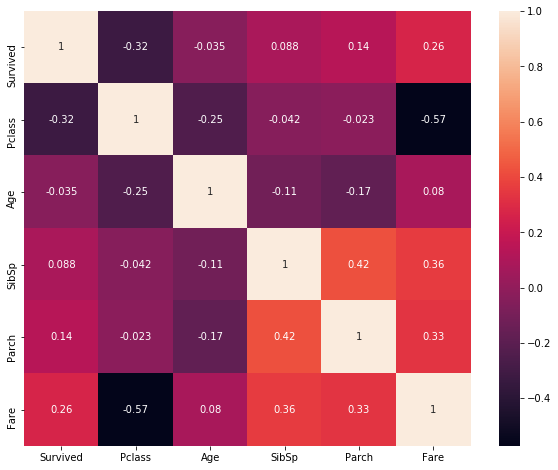

In [15]:
corr1=df.corr(method='kendall')
plt.figure(figsize=(10,8))
sns.heatmap(corr1,annot=True)

In [16]:
#again Ticket has no relation with survival so we can drop that also
df.drop(columns=['Ticket'],axis=1,inplace=True)
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


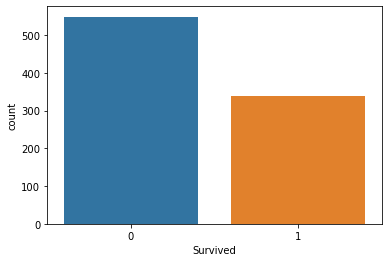

In [17]:
sns.countplot(df['Survived'])

In [18]:
df['SibSp'].unique()

array([1, 0, 3, 4, 2, 5, 8], dtype=int64)

In [19]:
df['Parch'].unique()

array([0, 1, 2, 5, 3, 4, 6], dtype=int64)

In [20]:
df['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

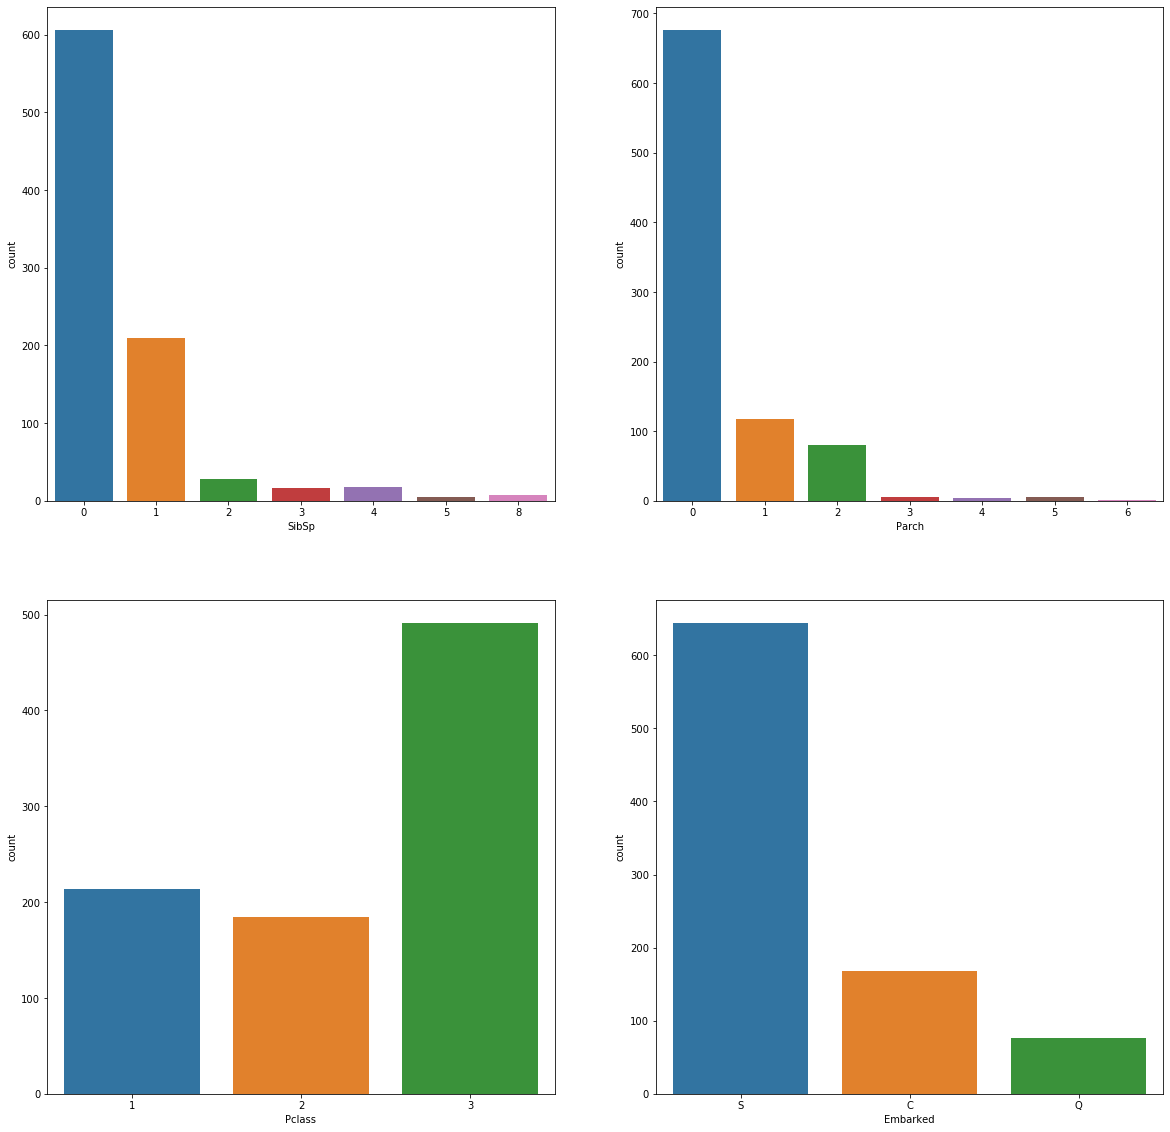

In [21]:
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.countplot(df['SibSp'],ax=axes[0][0])
sns.countplot(df['Parch'],ax=axes[0][1])
sns.countplot(df['Pclass'],ax=axes[1][0])
sns.countplot(df['Embarked'],ax=axes[1][1])

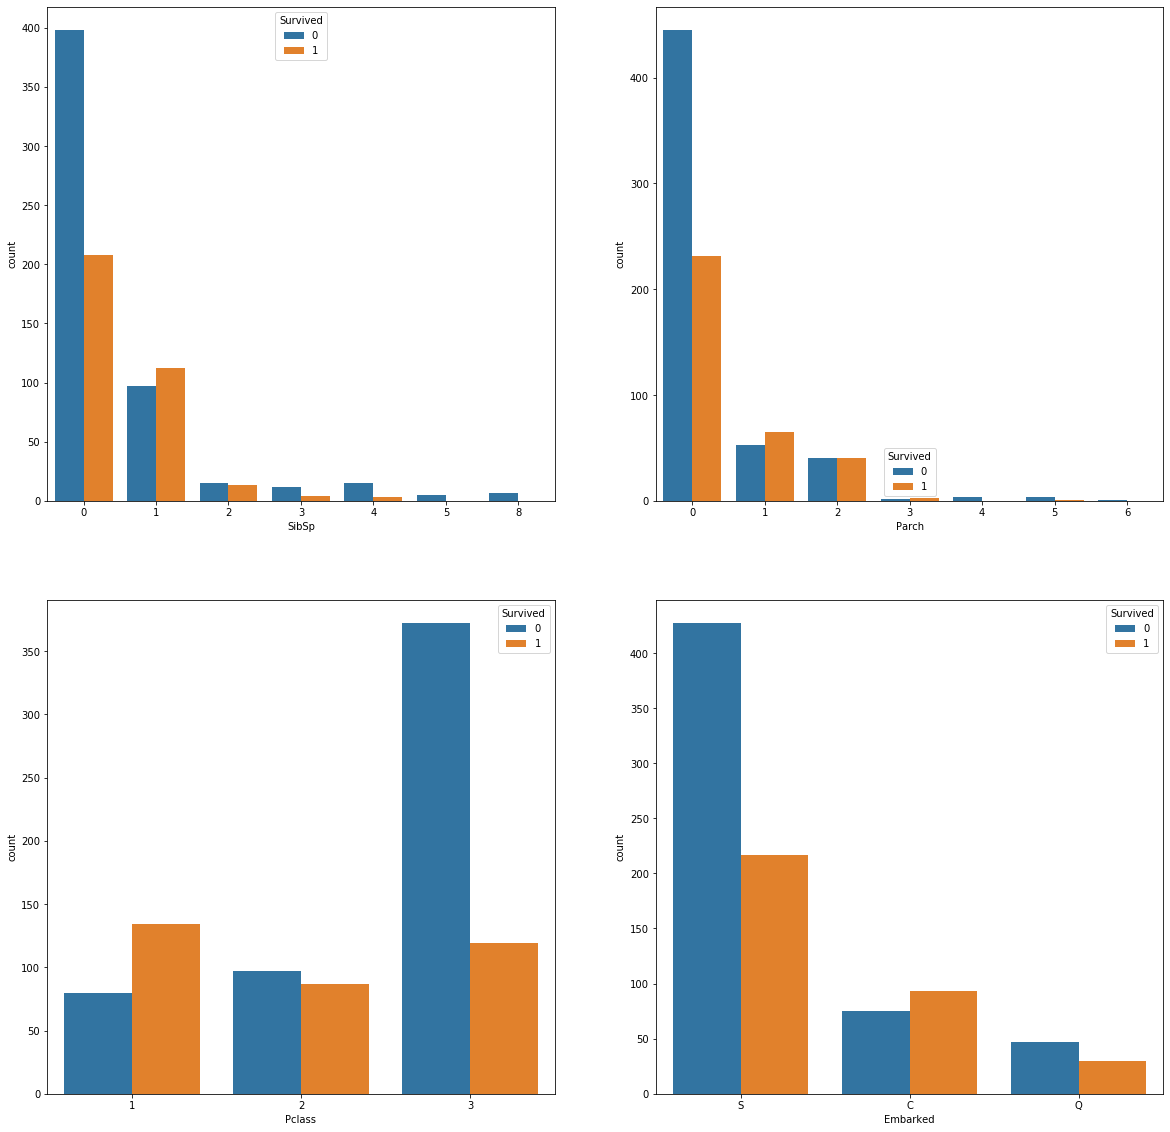

In [22]:
'''Following things were noted
1.Most of the passengers were travelling in the 3rd class 
2.Most of them have no siblings and no parents and children abroad
3.Most of them were travelling in the port S'''
fig,axes=plt.subplots(2,2,figsize=(20,20))
sns.countplot(df['SibSp'],hue=df['Survived'],ax=axes[0][0])
sns.countplot(df['Parch'],hue=df['Survived'],ax=axes[0][1])
sns.countplot(df['Pclass'],hue=df['Survived'],ax=axes[1][0])
sns.countplot(df['Embarked'],hue=df['Survived'],ax=axes[1][1])

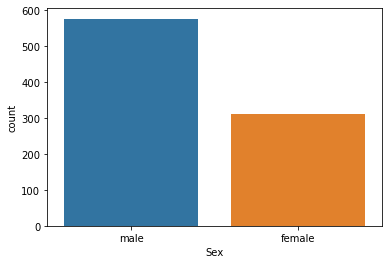

In [23]:
sns.countplot(df['Sex'])

In [24]:
df.groupby(['Survived'])['Sex'].value_counts()


Survived  Sex   
0         male      468
          female     81
1         female    231
          male      109
Name: Sex, dtype: int64

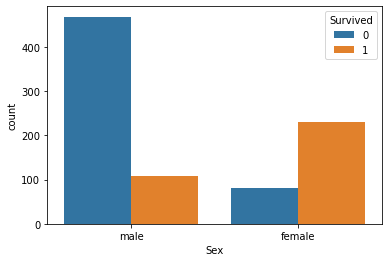

In [25]:
sns.countplot(df['Sex'],hue=df['Survived'])

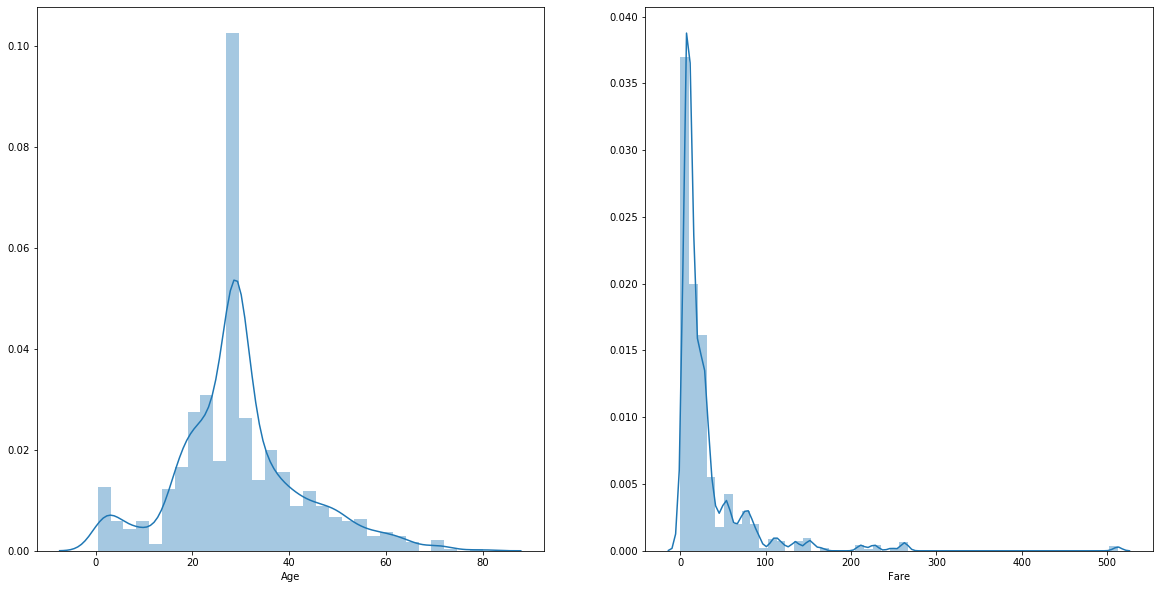

In [26]:
#More number of males were died as compared to that of females
fig,axes=plt.subplots(1,2,figsize=(20,10),squeeze=False)
sns.distplot(df['Age'],ax=axes[0][0])
sns.distplot(df['Fare'],ax=axes[0][1])

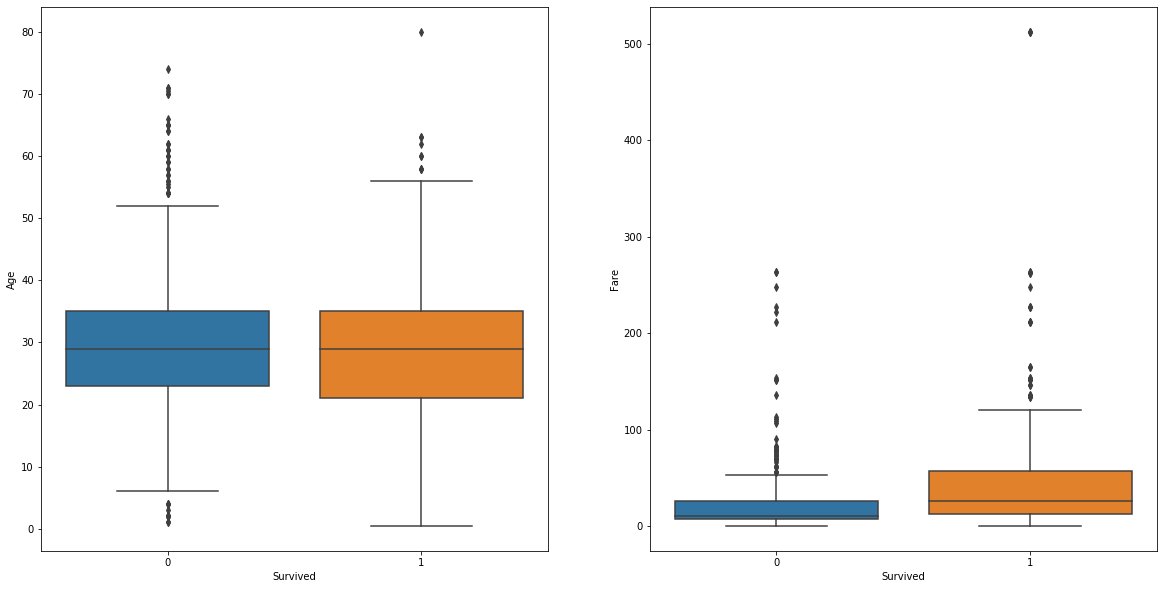

In [27]:
fig,axes=plt.subplots(1,2,figsize=(20,10),squeeze=False)
sns.boxplot(df['Survived'],df['Age'],ax=axes[0][0])
sns.boxplot(df['Survived'],df['Fare'],ax=axes[0][1])

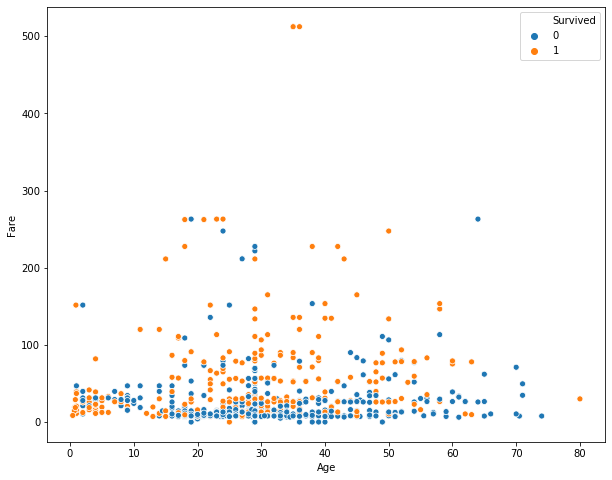

In [28]:
#Mean age for both survived and not survived passengers were same however the survived class has high mean for Fare than the not survived class
plt.figure(figsize=(10,8))
sns.scatterplot(df['Age'],df['Fare'],hue=df['Survived'])

In [29]:
#From this scatterplot we can also observe  that the not survived class i.e survived==0 class have low fare
df.head(1)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.25,S


In [30]:
df=pd.get_dummies(df,columns=['Survived','Pclass','Sex','SibSp','Parch','Embarked'],drop_first=True)
df.head(1)

,Age,Fare,Survived_1,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
0,22.0,7.25,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,1


In [31]:
x=df.drop(columns=['Survived_1'],axis=1)
y=df['Survived_1']
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=0)

In [32]:
x_train.head(1)

,Age,Fare,Pclass_2,Pclass_3,Sex_male,SibSp_1,SibSp_2,SibSp_3,SibSp_4,SibSp_5,SibSp_8,Parch_1,Parch_2,Parch_3,Parch_4,Parch_5,Parch_6,Embarked_Q,Embarked_S
364,29.0,15.5,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0


In [33]:
x_train.shape

(711, 19)

In [34]:
from sklearn.preprocessing import MinMaxScaler
scale=MinMaxScaler(feature_range=(0,1))
x_train=scale.fit_transform(x_train)
x_test=scale.fit_transform(x_test)

In [35]:
y_train.head(1)

364    0
Name: Survived_1, dtype: uint8

In [95]:
from sklearn.neighbors import KNeighborsClassifier
mod1=KNeighborsClassifier(n_neighbors=6)
mod1.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=6, p=2,
                     weights='uniform')


Classification Report:
               precision    recall  f1-score   support

           0       0.73      0.87      0.79       105
           1       0.74      0.55      0.63        73

    accuracy                           0.74       178
   macro avg       0.74      0.71      0.71       178
weighted avg       0.74      0.74      0.73       178



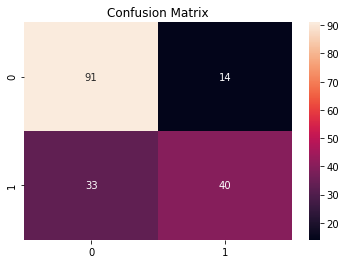

In [96]:
from sklearn.metrics import confusion_matrix,classification_report
def performance(model,train_x,train_y,test_x,test_y):
     pred_y=model.predict(test_x)
     cm=confusion_matrix(test_y,pred_y)
     plt.title('Confusion Matrix')
     sns.heatmap(cm,annot=True)
     print("\nClassification Report:\n",classification_report(test_y,pred_y))
performance(mod11,x_train,y_train,x_test,y_test)

In [97]:
def scoring(model,train_x,train_y,test_x,test_y):
    print("\n Training Score",model.score(train_x,train_y))
    print("\n Testing Score",model.score(test_x,test_y))
scoring(mod1,x_train,y_train,x_test,y_test)


 Training Score 0.8537271448663853

 Testing Score 0.7528089887640449


In [48]:
from sklearn.linear_model import LogisticRegression
mod2=LogisticRegression(multi_class='auto')
mod2.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.86      0.79       105
           1       0.73      0.56      0.64        73

    accuracy                           0.74       178
   macro avg       0.73      0.71      0.71       178
weighted avg       0.74      0.74      0.73       178



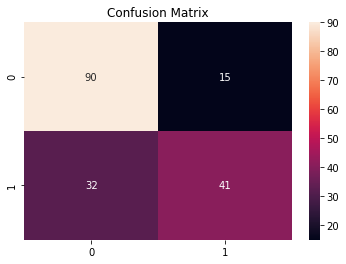

In [49]:
performance(mod2,x_train,y_train,x_test,y_test)

In [50]:
scoring(mod2,x_train,y_train,x_test,y_test)


 Training Score 0.8340365682137834

 Testing Score 0.7359550561797753


In [98]:
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
mod3=SVC()
mod33=GridSearchCV(mod3,param_grid={'kernel':['rbf','linear','poly'],'C':[0.4,0.6,0.8,1]},cv=5)
mod33.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [0.4, 0.6, 0.8, 1],
                         'kernel': ['rbf', 'linear', 'poly']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [99]:
mod33.best_params_

{'C': 0.6, 'kernel': 'poly'}


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.83      0.78       105
           1       0.70      0.59      0.64        73

    accuracy                           0.73       178
   macro avg       0.72      0.71      0.71       178
weighted avg       0.73      0.73      0.73       178



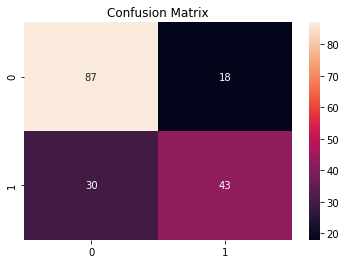

In [101]:
performance(mod33,x_train,y_train,x_test,y_test)

In [103]:
scoring(mod33,x_train,y_train,x_test,y_test)


 Training Score 0.8551336146272855

 Testing Score 0.7303370786516854


In [106]:
from sklearn.tree import DecisionTreeClassifier
mod4=DecisionTreeClassifier(random_state=0)
mod44=GridSearchCV(mod4,param_grid={'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3]},cv=5)
mod44.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=0, splitter='best'),
             iid='deprecated', n_jobs=None,
             param_grid={'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 2, 3]},
           

In [107]:
mod44.best_params_

{'criterion': 'entropy', 'min_samples_leaf': 3}


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.85      0.79       105
           1       0.72      0.56      0.63        73

    accuracy                           0.73       178
   macro avg       0.73      0.70      0.71       178
weighted avg       0.73      0.73      0.72       178



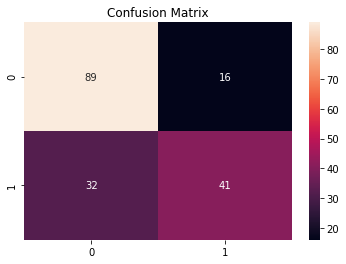

In [108]:
performance(mod44,x_train,y_train,x_test,y_test)

In [110]:
scoring(mod44,x_train,y_train,x_test,y_test)


 Training Score 0.9085794655414908

 Testing Score 0.7303370786516854


In [111]:
from sklearn.naive_bayes import MultinomialNB
mod5=MultinomialNB()
mod5.fit(x_train,y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)


Classification Report:
               precision    recall  f1-score   support

           0       0.71      0.89      0.79       105
           1       0.74      0.48      0.58        73

    accuracy                           0.72       178
   macro avg       0.73      0.68      0.69       178
weighted avg       0.72      0.72      0.70       178



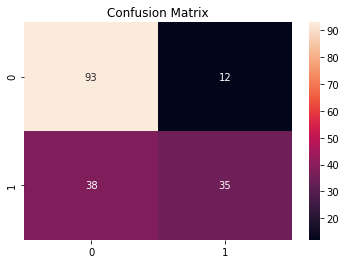

In [112]:
performance(mod5,x_train,y_train,x_test,y_test)

In [113]:
scoring(mod5,x_train,y_train,x_test,y_test)


 Training Score 0.7369901547116737

 Testing Score 0.7191011235955056


In [114]:
from sklearn.ensemble import RandomForestClassifier
mod6=RandomForestClassifier(random_state=0)
mod66=GridSearchCV(mod6,param_grid={'n_estimators':np.arange(150,300,15),'criterion':['gini','entropy'],'min_samples_leaf':[1,2,3,4]},cv=5)
mod66.fit(x_train,y_train)

GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False, random_state=0,
                                   

In [115]:
mod66.best_params_

{'criterion': 'gini', 'min_samples_leaf': 3, 'n_estimators': 195}


Classification Report:
               precision    recall  f1-score   support

           0       0.74      0.87      0.80       105
           1       0.75      0.56      0.64        73

    accuracy                           0.74       178
   macro avg       0.74      0.71      0.72       178
weighted avg       0.74      0.74      0.73       178



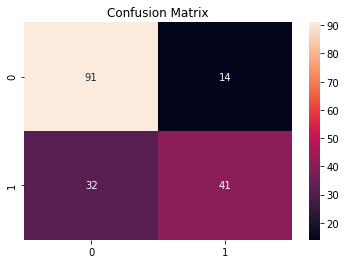

In [116]:
performance(mod66,x_train,y_train,x_test,y_test)

In [117]:
scoring(mod66,x_train,y_train,x_test,y_test)


 Training Score 0.8748241912798875

 Testing Score 0.7415730337078652
